--- 模型架構 ---


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,401 (25.00 KB)

 Trainable params: 6,401 (25.00 KB)

 Non-trainable params: 0 (0.00 B)

---------------------


開始訓練模型 (同 Assignment 1)...
Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1282 - val_loss: 0.0773
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0499 - val_loss: 0.0068
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 - val_loss: 0.0010
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.4915e-04 - val_loss: 4.8187e-04
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.2054e-04 - val_loss: 2.9384e-04
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7196e-04 - val_loss: 2.2074e-04
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1086e-04 - val_loss: 1.9172e-04
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8553e-04 - val_loss: 1.3963e-04
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2308e-04 - val_loss: 1.2179e-04
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2342e-04 - val_loss: 9.3195e-05
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0

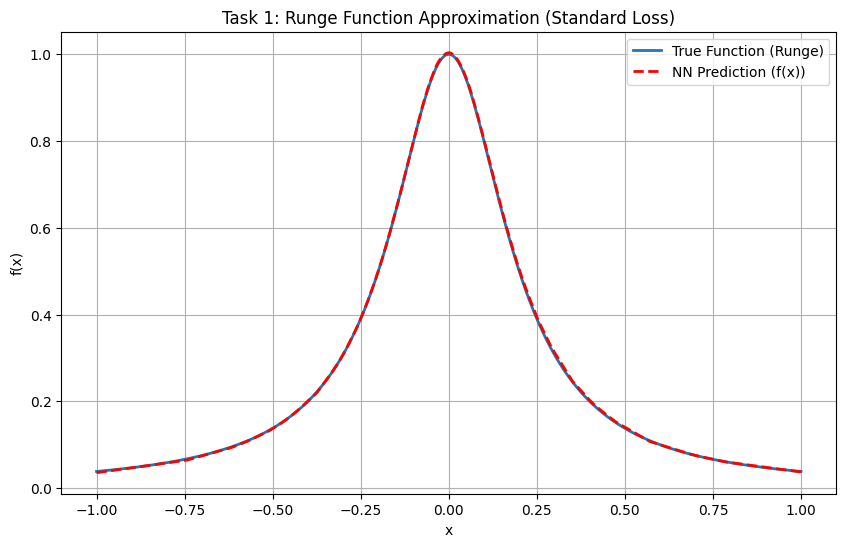

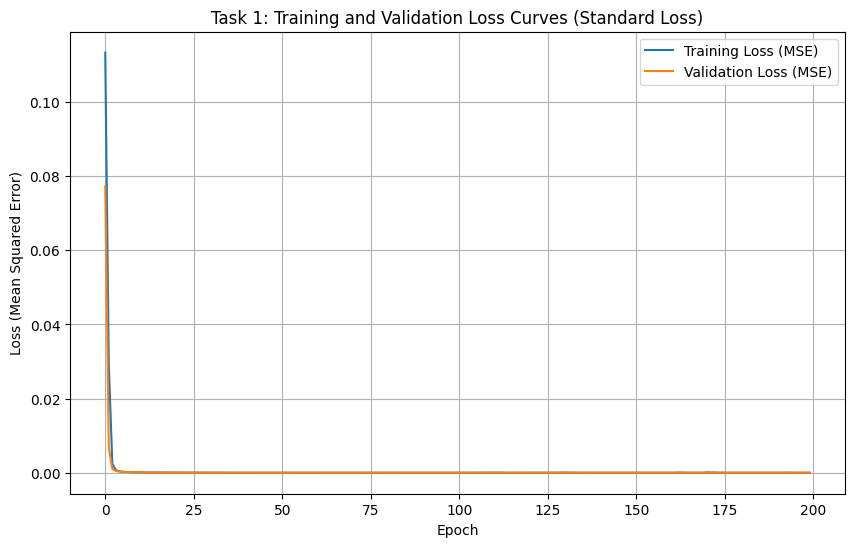

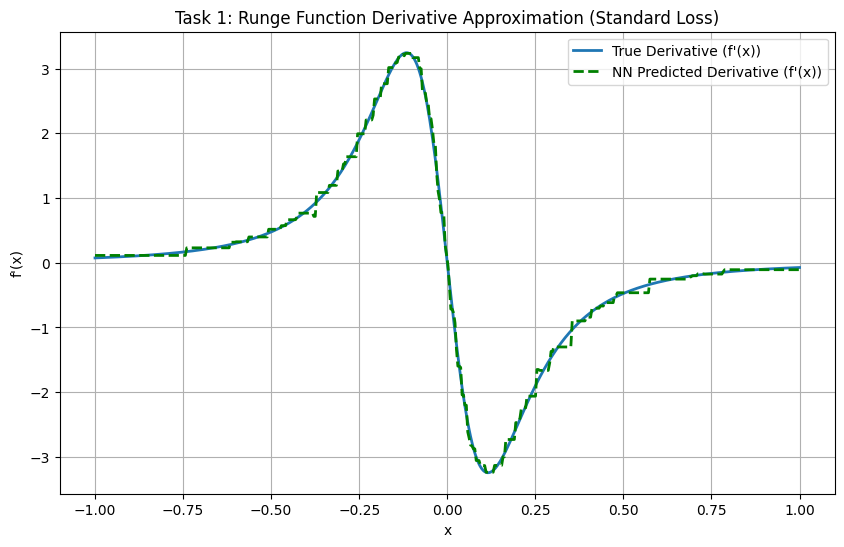


--- Task 1: 錯誤報告 (標準損失模型) ---
函數 f(x) - Mean Squared Error (MSE): 0.00000458
函數 f(x) - Maximum Error:            0.00613930
----------------------------------------
導數 f'(x) - Mean Squared Error (MSE): 0.00395495
導數 f'(x) - Maximum Error:            0.27633217
----------------------------------------


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

def runge_function(x):
    return 1 / (1 + 25 * x**2)

# Runge 函數的真實導數
def runge_derivative(x):
    return (-50 * x) / ((1 + 25 * x**2)**2)


N_train = 1000
X_train = np.random.uniform(-1, 1, N_train).reshape(-1, 1)
y_train = runge_function(X_train)

N_val = 200
X_val = np.random.uniform(-1, 1, N_val).reshape(-1, 1)
y_val = runge_function(X_val)

X_test = np.linspace(-1, 1, 500).reshape(-1, 1)
y_test_true = runge_function(X_test)
y_test_true_deriv = runge_derivative(X_test)


model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(1,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

print("--- 模型架構 ---")
model.summary()
print("---------------------\n")


model.compile(optimizer='adam', loss='mean_squared_error')

print("\n開始訓練模型 (同 Assignment 1)...")
history = model.fit(
    X_train,
    y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)
print("模型訓練完成！")

y_pred_nn = model.predict(X_test)

X_test_tf = tf.constant(X_test, dtype=tf.float32)

with tf.GradientTape() as tape:
    tape.watch(X_test_tf)
    y_pred_tf = model(X_test_tf)


dy_dx_pred = tape.gradient(y_pred_tf, X_test_tf)
dy_dx_pred_np = dy_dx_pred.numpy()


plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test_true, label='True Function (Runge)', linewidth=2)
plt.plot(X_test, y_pred_nn, label='NN Prediction (f(x))', linestyle='--', linewidth=2, color='red')
plt.title('Task 1: Runge Function Approximation (Standard Loss)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Task 1: Training and Validation Loss Curves (Standard Loss)')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test_true_deriv, label="True Derivative (f'(x))", linewidth=2)
plt.plot(X_test, dy_dx_pred_np, label="NN Predicted Derivative (f'(x))", linestyle='--', linewidth=2, color='green')
plt.title("Task 1: Runge Function Derivative Approximation (Standard Loss)")
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.legend()
plt.grid(True)
plt.show()


func_mse = np.mean(np.square(y_test_true - y_pred_nn))
func_max_error = np.max(np.abs(y_test_true - y_pred_nn))


deriv_mse = np.mean((y_test_true_deriv - dy_dx_pred_np)**2)
deriv_max_error = np.max(np.abs(y_test_true_deriv - dy_dx_pred_np))

print("\n--- Task 1: 錯誤報告 (標準損失模型) ---")
print(f"函數 f(x) - Mean Squared Error (MSE): {func_mse:.8f}")
print(f"函數 f(x) - Maximum Error:            {func_max_error:.8f}")
print("-" * 40)
print(f"導數 f'(x) - Mean Squared Error (MSE): {deriv_mse:.8f}")
print(f"導數 f'(x) - Maximum Error:            {deriv_max_error:.8f}")
print("-" * 40)